In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
data = pd.read_csv(r"/content/FeatureEngineering - Sheet1.csv")

# Inspect your data
print(data.head())
print(data.info())
print(data.describe())
print(data.isna().sum())

        MMSI        DepartureTime      LATd      LONd          ArrivalTime  \
0  205366000  2017-11-26 19:51:00  57.40660  21.53463  2017-11-26 19:51:00   
1  205366000  2017-11-27 13:18:00  57.40660  21.53437  2017-12-28 13:57:00   
2  205366000   2018-06-02 7:38:00  54.16003  12.14130   2018-06-03 5:43:00   
3  205366000  2018-06-03 12:16:00  57.59602  11.69184   2018-06-08 5:43:00   
4  205366000   2018-09-15 8:27:00  59.42259  27.72447  2018-10-01 15:16:00   

       LATa      LONa  AVGSPDkmph  DistanceKm  VesselType  Length  Width  \
0  57.40660  21.53463       28.65   723.43028        80.0   143.0   21.0   
1  54.16002  12.14124        2.73  2030.43443        80.0   143.0   21.0   
2  57.59724  11.69437       21.09   465.67234        80.0   143.0   21.0   
3  54.16005  12.14124        5.49   622.78374        80.0   143.0   21.0   
4  54.16008  12.14128        6.03  2356.37863        80.0   143.0   21.0   

   Draft  
0    8.2  
1    8.2  
2    8.2  
3    8.2  
4    8.2  
<class '

In [ ]:
# Convert timestamps to datetime format (Ensure correct format strings)
data['DepartureTime'] = pd.to_datetime(data['DepartureTime'], format="%Y-%m-%d %H:%M:%S")
data['ArrivalTime'] = pd.to_datetime(data['ArrivalTime'], format="%Y-%m-%d %H:%M:%S")

# Handle missing values
data['ArrivalTime'].fillna(method='ffill', inplace=True)  # Adjust missing value method if needed

# Calculate travel duration
data['TravelDuration (seconds)'] = (data['ArrivalTime'] - data['DepartureTime']).dt.total_seconds()

In [ ]:
X = data[['LATd', 'LONd', 'LATa', 'LONa', 'AVGSPDkmph', 'DistanceKm', 'VesselType', 'Length', 'Width', 'Draft']]
y = data['TravelDuration (seconds)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

r2 = model.score(X_test, y_test)
print("R-squared:", r2)

Mean Absolute Error: 132807.69417914
Mean Squared Error: 47566155269.873795
R-squared: 0.7633742148562863


In [ ]:
# Perform cross-validation for MAE, MSE, and R2
cv_mae = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
cv_mse = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

print("Cross-Validation Mean Absolute Error (MAE):", cv_mae)
print("Cross-Validation Mean Squared Error (MSE):", cv_mse)
print("Cross-Validation R-squared (R2):", cv_r2)

Cross-Validation Mean Absolute Error (MAE): 122101.1920611118
Cross-Validation Mean Squared Error (MSE): 48067793250.44307
Cross-Validation R-squared (R2): 0.6976940475783857


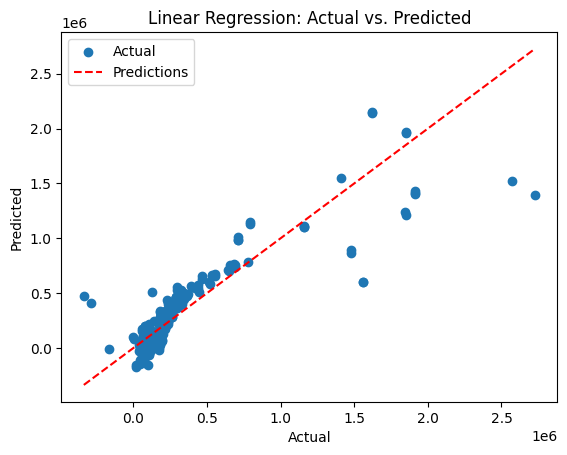

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, label='Actual')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Predictions')
plt.legend()
plt.show()